# Load and Review Data 

In [106]:
#Import necessary libraries 

import numpy as np #linear algebra
import pandas as pd # data processing, csv file
import matplotlib.pyplot as plt #plotting
import seaborn as sns #plotting heatmap
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from pandas import Series, DataFrame
from matplotlib import pyplot
%matplotlib inline 

In [107]:
# Import data, convert string dates to 'datetime64' and set the date column as index:

df = pd.read_csv('canadian_covidinfo.csv',
                parse_dates=['date'],
                infer_datetime_format=True,
                index_col='date',
                thousands=',',
                decimal='.'
                )

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 496 entries, 2020-01-26 to 2021-06-04
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         496 non-null    object 
 1   continent                        496 non-null    object 
 2   location                         496 non-null    object 
 3   total_cases                      496 non-null    int64  
 4   new_cases                        496 non-null    int64  
 5   new_cases_smoothed               491 non-null    float64
 6   total_deaths                     453 non-null    float64
 7   new_deaths                       453 non-null    float64
 8   new_deaths_smoothed              491 non-null    float64
 9   total_cases_per_million          496 non-null    float64
 10  new_cases_per_million            496 non-null    float64
 11  new_cases_smoothed_per_million   491 non-null    float64
 12  tot

In [6]:
df.head()

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred
date,,,,,,,,,,,,,,,,,,,,,
2020-01-26,CAN,North America,Canada,1,1,NaN,NaN,NaN,NaN,0.026,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-27,CAN,North America,Canada,1,0,NaN,NaN,NaN,NaN,0.026,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-28,CAN,North America,Canada,2,1,NaN,NaN,NaN,NaN,0.053,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-29,CAN,North America,Canada,2,0,NaN,NaN,NaN,NaN,0.053,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-30,CAN,North America,Canada,2,0,NaN,NaN,NaN,NaN,0.053,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df = df.fillna(0) #fill all NAN values with zeros, as the number zero has significance in this dataset

In [8]:
df.head()

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred
date,,,,,,,,,,,,,,,,,,,,,
2020-01-26,CAN,North America,Canada,1,1,0.0,0.0,0.0,0.0,0.026,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-27,CAN,North America,Canada,1,0,0.0,0.0,0.0,0.0,0.026,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-28,CAN,North America,Canada,2,1,0.0,0.0,0.0,0.0,0.053,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-29,CAN,North America,Canada,2,0,0.0,0.0,0.0,0.0,0.053,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-30,CAN,North America,Canada,2,0,0.0,0.0,0.0,0.0,0.053,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 496 entries, 2020-01-26 to 2021-06-04
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         496 non-null    object 
 1   continent                        496 non-null    object 
 2   location                         496 non-null    object 
 3   total_cases                      496 non-null    int64  
 4   new_cases                        496 non-null    int64  
 5   new_cases_smoothed               496 non-null    float64
 6   total_deaths                     496 non-null    float64
 7   new_deaths                       496 non-null    float64
 8   new_deaths_smoothed              496 non-null    float64
 9   total_cases_per_million          496 non-null    float64
 10  new_cases_per_million            496 non-null    float64
 11  new_cases_smoothed_per_million   496 non-null    float64
 12  tot

In [10]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred
count,4.960000e+02,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,...,496.000000,496.000000,496.000000,496.000000,4.960000e+02,4.960000e+02,4.960000e+02,496.000000,496.000000,496.000000
mean,4.069611e+05,2817.278226,2804.406405,11787.100806,51.750000,51.521597,10782.667831,74.645379,74.304337,312.305956,...,441.288306,11.692187,1842.149194,48.808778,2.251700e+06,2.027488e+06,2.216884e+05,51204.522177,48833.731855,5.965887
std,4.309676e+05,2781.700530,2652.981671,8038.016947,52.998323,50.586398,11418.731718,73.702752,70.292268,212.971855,...,398.443106,10.556990,1433.682591,37.986244,5.344862e+06,4.896502e+06,4.619587e+05,107056.037522,101823.891614,14.161320
min,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.026000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,9.067575e+04,454.750000,441.821750,7777.000000,8.000000,7.571000,2402.505750,12.049000,11.706000,206.056000,...,74.750000,1.980500,411.000000,10.890000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,1.600490e+05,1764.500000,1776.500000,9382.000000,34.000000,35.785500,4240.589500,46.751500,47.069500,248.581500,...,375.000000,9.936000,1987.500000,52.660000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
75%,7.848205e+05,4532.000000,4771.035750,20067.000000,83.000000,82.536000,20794.267750,120.077500,126.411250,531.686750,...,680.250000,18.023250,2958.500000,78.386750,9.617948e+05,8.487980e+05,1.129968e+05,28739.750000,27400.250000,2.550000
max,1.397370e+06,16141.000000,9626.857000,25668.000000,244.000000,193.143000,37024.116000,427.665000,255.069000,680.088000,...,1469.000000,38.922000,4879.000000,129.272000,2.539745e+07,2.282563e+07,2.571814e+06,488221.000000,374185.000000,67.290000


In [11]:
df.head(10)

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred
date,,,,,,,,,,,,,,,,,,,,,
2020-01-26,CAN,North America,Canada,1,1,0.000,0.0,0.0,0.0,0.026,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-27,CAN,North America,Canada,1,0,0.000,0.0,0.0,0.0,0.026,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-28,CAN,North America,Canada,2,1,0.000,0.0,0.0,0.0,0.053,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-29,CAN,North America,Canada,2,0,0.000,0.0,0.0,0.0,0.053,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-30,CAN,North America,Canada,2,0,0.000,0.0,0.0,0.0,0.053,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-31,CAN,North America,Canada,4,2,0.571,0.0,0.0,0.0,0.106,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-01,CAN,North America,Canada,4,0,0.571,0.0,0.0,0.0,0.106,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-02,CAN,North America,Canada,4,0,0.429,0.0,0.0,0.0,0.106,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-03,CAN,North America,Canada,4,0,0.429,0.0,0.0,0.0,0.106,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 496 entries, 2020-01-26 to 2021-06-04
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         496 non-null    object 
 1   continent                        496 non-null    object 
 2   location                         496 non-null    object 
 3   total_cases                      496 non-null    int64  
 4   new_cases                        496 non-null    int64  
 5   new_cases_smoothed               496 non-null    float64
 6   total_deaths                     496 non-null    float64
 7   new_deaths                       496 non-null    float64
 8   new_deaths_smoothed              496 non-null    float64
 9   total_cases_per_million          496 non-null    float64
 10  new_cases_per_million            496 non-null    float64
 11  new_cases_smoothed_per_million   496 non-null    float64
 12  tot

In [13]:
df = df.drop(['iso_code','continent','location',
             'new_cases','new_cases_smoothed','new_deaths',
             'new_deaths_smoothed','total_cases_per_million',
             'new_deaths_per_million','new_deaths_smoothed_per_million',
             'icu_patients_per_million','hosp_patients_per_million',
             'new_vaccinations_smoothed','total_vaccinations_per_hundred'], axis=1)

In [14]:
df.head(10)

,total_cases,total_deaths,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,reproduction_rate,icu_patients,hosp_patients,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations
date,,,,,,,,,,,,
2020-01-26,1,0.0,0.026,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-27,1,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-28,2,0.0,0.026,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-29,2,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-30,2,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-31,4,0.0,0.053,0.015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-01,4,0.0,0.000,0.015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-02,4,0.0,0.000,0.011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-03,4,0.0,0.000,0.011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
df = df.fillna(0)

In [16]:
df = df.drop(['new_cases_per_million','new_cases_smoothed_per_million',
             'total_deaths_per_million'], axis=1)

In [17]:
df.head(10)

,total_cases,total_deaths,reproduction_rate,icu_patients,hosp_patients,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations
date,,,,,,,,,
2020-01-26,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-27,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-28,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-29,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-30,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-31,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-01,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-02,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-03,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


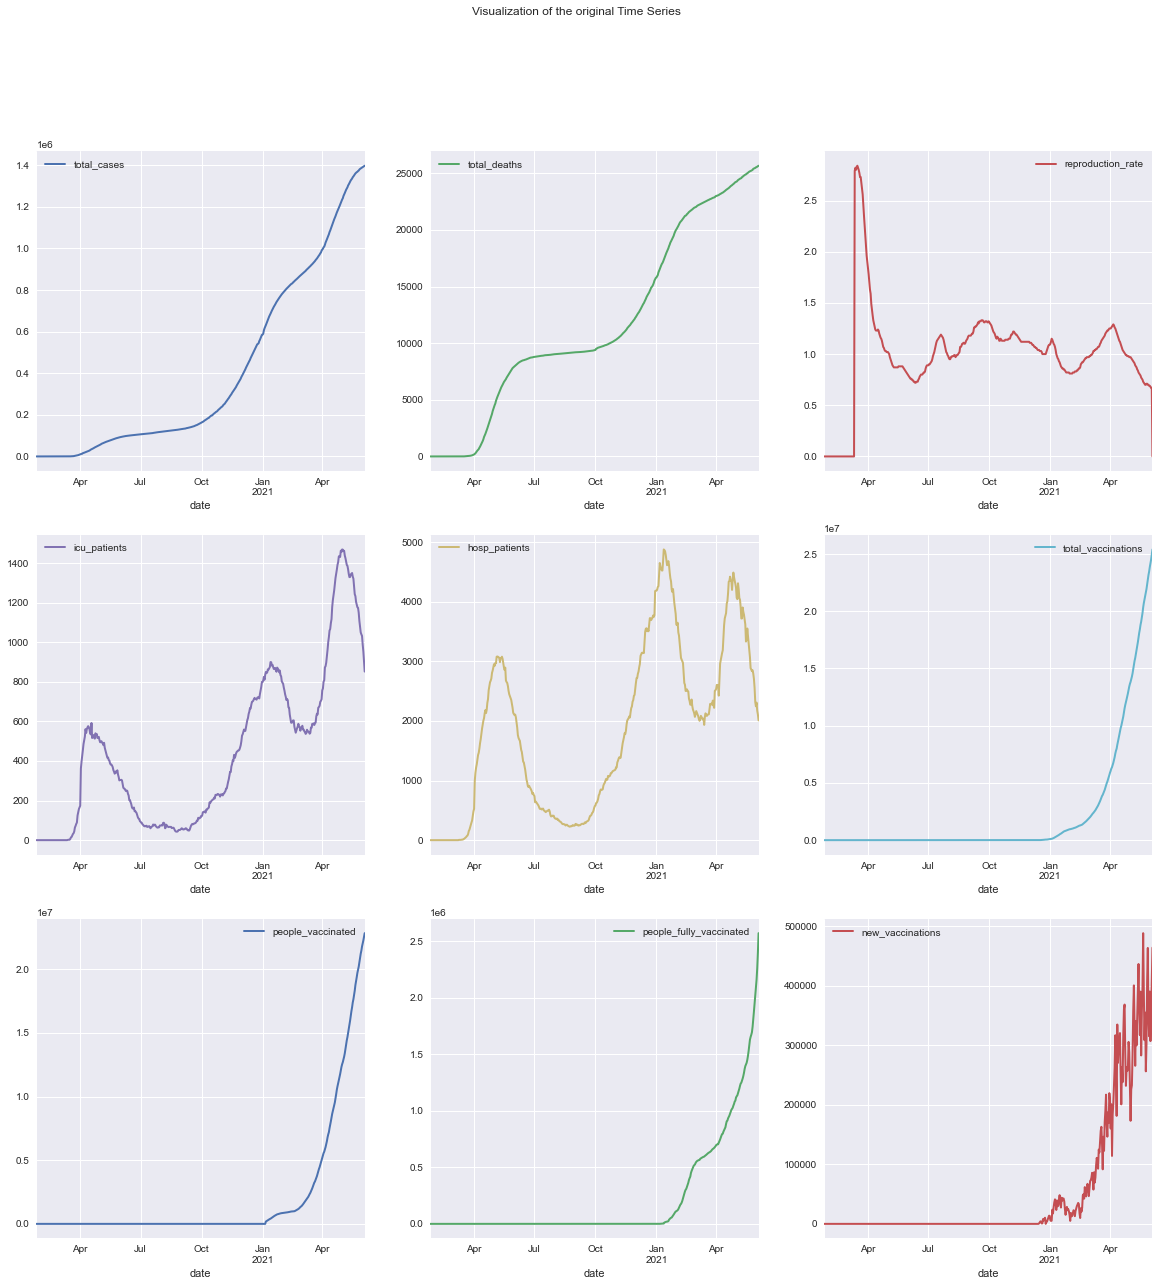

In [18]:
plt.style.use('seaborn')
df.plot(subplots=True,
       layout=(3,3),
       figsize=(20,20),
       fontsize=10,
       linewidth=2,
        sharex=False,
       title='Visualization of the original Time Series')
plt.show()

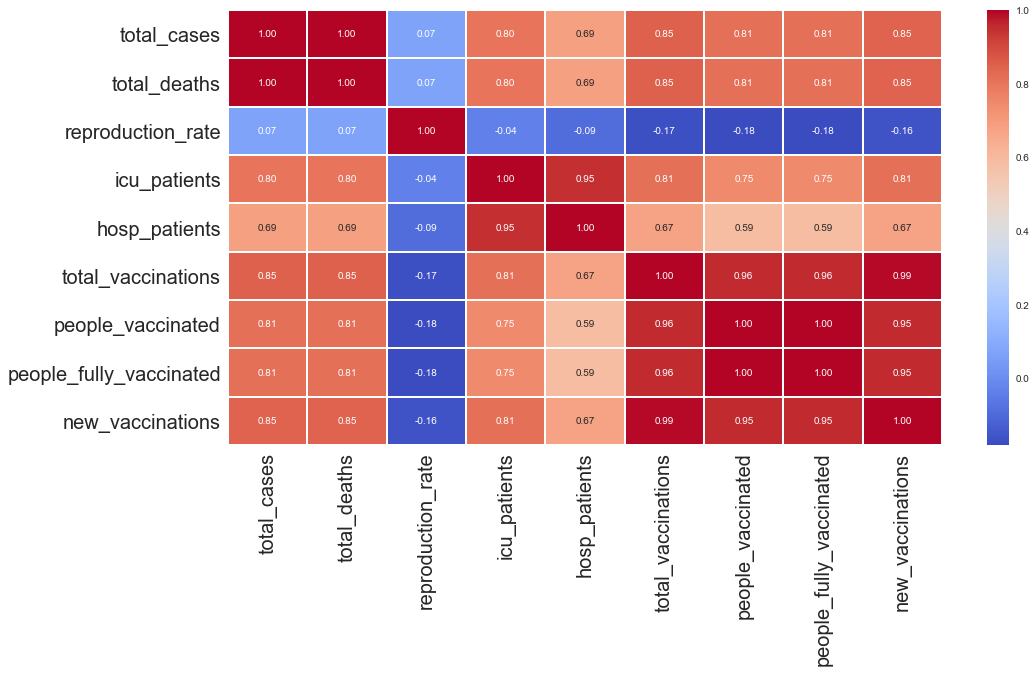

In [19]:
#Let's also draw a heatmap of the correlation matrix 

corr_matrix = df.corr(method='spearman')
f, ax = plt.subplots(figsize=(16,8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidth=0.4,
           annot_kws={"size": 10}, cmap='coolwarm', ax=ax)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

# Feature Engineering  

In [20]:
df.head(10)

,total_cases,total_deaths,reproduction_rate,icu_patients,hosp_patients,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations
date,,,,,,,,,
2020-01-26,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-27,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-28,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-29,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-30,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-31,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-01,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-02,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-03,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
df = df.reset_index()

In [22]:
df = df[df['total_vaccinations'] > 0 ]

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 323 to 495
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     173 non-null    datetime64[ns]
 1   total_cases              173 non-null    int64         
 2   total_deaths             173 non-null    float64       
 3   reproduction_rate        173 non-null    float64       
 4   icu_patients             173 non-null    float64       
 5   hosp_patients            173 non-null    float64       
 6   total_vaccinations       173 non-null    float64       
 7   people_vaccinated        173 non-null    float64       
 8   people_fully_vaccinated  173 non-null    float64       
 9   new_vaccinations         173 non-null    float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 14.9 KB


In [24]:
df.head(40)

,date,total_cases,total_deaths,reproduction_rate,icu_patients,hosp_patients,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations
323,2020-12-14,472820,13677.0,1.04,665.0,3335.0,5.0,0.0,0.0,0.0
324,2020-12-15,479064,13793.0,1.04,684.0,3499.0,723.0,0.0,0.0,718.0
325,2020-12-16,485576,13911.0,1.03,699.0,3549.0,3023.0,0.0,0.0,2300.0
326,2020-12-17,492582,14067.0,1.03,701.0,3556.0,7202.0,0.0,0.0,4179.0
327,2020-12-18,499282,14180.0,1.03,705.0,3506.0,11174.0,0.0,0.0,3972.0
328,2020-12-19,505741,14284.0,1.02,713.0,3542.0,11894.0,0.0,0.0,720.0
329,2020-12-20,511748,14374.0,1.00,719.0,3506.0,12738.0,0.0,0.0,844.0
330,2020-12-21,519325,14481.0,1.00,713.0,3616.0,20866.0,0.0,0.0,8128.0
331,2020-12-22,525585,14607.0,1.00,713.0,3726.0,26603.0,0.0,0.0,5737.0
332,2020-12-23,532506,14752.0,1.00,710.0,3725.0,35089.0,0.0,0.0,8486.0


# Linear Regression

In [25]:
#train, test = train_test_split(df, test_size=0.2)

In [26]:
#X = dftemp[['GDP','Prevalence of obesity']]
X = df[['total_vaccinations','people_vaccinated','people_fully_vaccinated','new_vaccinations']]
y = df['icu_patients']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)


Exploring the relationship between Vaccination rates and Reproduction Rate in Canada 2020-2021

In [405]:
x_train = train[['total_vaccinations','people_vaccinated','people_fully_vaccinated','new_vaccinations']]
x_test = test[['total_vaccinations','people_vaccinated','people_fully_vaccinated','new_vaccinations']]


y_train = train['icu_patients']
y_test = test['icu_patients']

In [27]:
#Playing with LASSO
feat_predict = linear_model.Lasso(alpha=0.05, normalize =True, max_iter = 1000)
feat_predict.fit(x_train, y_train)
print(feat_predict.coef_)
print(feat_predict.intercept_)

#LASSO really says only use the last feature in prediction, which is 'new_vaccinations'

[ 5.51653181e-05  2.38659894e-05 -9.73716671e-04  1.44256589e-03]
790.9242677509462


/Users/bryanekeh/.local/share/virtualenvs/inf2179-LwGPGwJW/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6253.548847861821, tolerance: 962.2717095652175
  model = cd_fast.enet_coordinate_descent(


In [28]:
lasso_case_predict_y = feat_predict.predict(x_test)

<AxesSubplot:title={'center':'Model Coefficients'}>

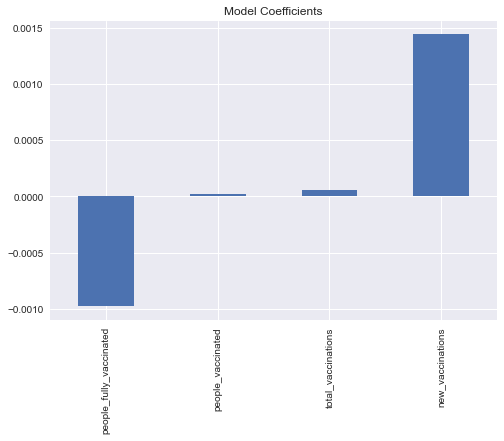

In [29]:
predictors = x_train.columns

coef = Series(feat_predict.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Model Coefficients')

In [30]:
# The results of the LASSO
#print('Coefficients: \n', feat_predict.coef_)

#The mean squared error
print('Mean squared error of Test: %.2f'
     % mean_squared_error(y_test, lasso_case_predict_y))
# The coefficnet of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
     % r2_score(y_test, lasso_case_predict_y))
#The mean absolute error 
print('Mean absolute error (MAE): %.2f'
     % mean_absolute_error(y_test, lasso_case_predict_y))
#The root mean squared error
print('Root mean squared error: %.2f'
     % np.sqrt(mean_squared_error(y_test, lasso_case_predict_y)))


Mean squared error of Test: 17592.67
Coefficient of determination: 0.79
Mean absolute error (MAE): 86.28
Root mean squared error: 132.64


,Actual,Predicted
377,708.0,737.434766
469,1386.0,1186.011768
386,598.0,597.295021
378,713.0,718.555371
448,1237.0,958.247235
423,639.0,743.467372
330,713.0,803.800523
478,1321.0,1260.393552
427,679.0,741.310179
412,538.0,580.706329


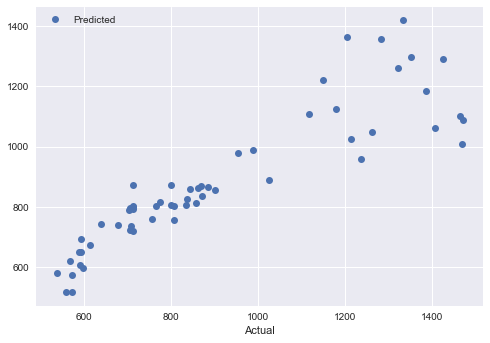

In [31]:
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': lasso_case_predict_y})
display(df2)



df2.plot(x='Actual', y='Predicted', style='o')

plt.show()

In [32]:
model = linear_model.LinearRegression().fit(x_train, y_train)

In [33]:
case_predict_y = model.predict(x_test)

<AxesSubplot:title={'center':'Model Coefficients'}>

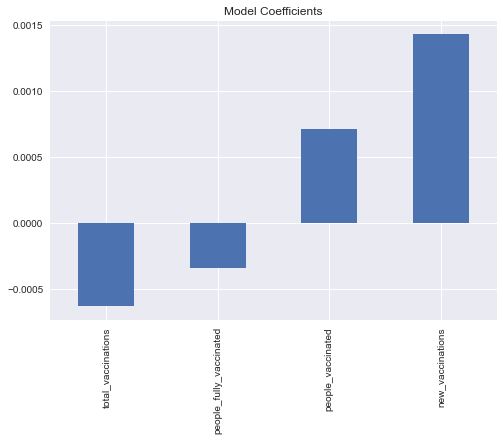

In [34]:
predictors = x_train.columns

coef = Series(model.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Model Coefficients')

In [35]:
# The coefficients
print('Coefficients: \n', model.coef_)

#The mean squared error
print('Mean squared error of Test: %.2f'
     % mean_squared_error(y_test, case_predict_y))
# The coefficnet of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
     % r2_score(y_test, case_predict_y))
#The mean absolute error 
print('Mean absolute error (MAE): %.2f'
     % mean_absolute_error(y_test, case_predict_y))
#The root mean squared error
print('Root mean squared error: %.2f'
     % np.sqrt(mean_squared_error(y_test, case_predict_y)))
#The intercept
print('Intercept: %.2f'
     % model.intercept_)

Coefficients: 
 [-0.00062801  0.0007107  -0.00033701  0.00142951]
Mean squared error of Test: 17416.07
Coefficient of determination: 0.79
Mean absolute error (MAE): 88.43
Root mean squared error: 131.97
Intercept: 805.76


,Actual,Predicted
377,708.0,747.417876
469,1386.0,1193.117337
386,598.0,601.162436
378,713.0,728.316590
448,1237.0,961.265755
423,639.0,739.977563
330,713.0,804.272317
478,1321.0,1268.779827
427,679.0,739.559138
412,538.0,575.195423


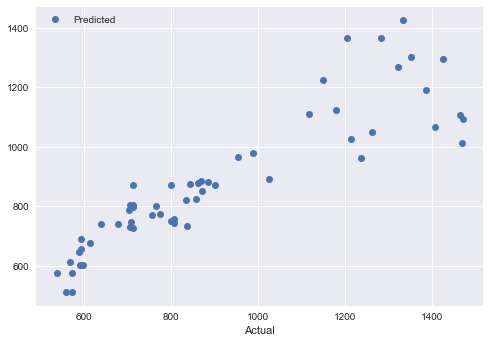

In [36]:
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': case_predict_y})
display(df2)



df2.plot(x='Actual', y='Predicted', style='o')

plt.show()

In [37]:
display(y_test)

377     708.0
469    1386.0
386     598.0
378     713.0
448    1237.0
423     639.0
330     713.0
478    1321.0
427     679.0
412     538.0
461    1469.0
466    1425.0
328     713.0
420     591.0
486    1149.0
416     588.0
356     886.0
341     799.0
384     594.0
374     756.0
389     573.0
360     870.0
327     705.0
441    1026.0
383     614.0
432     766.0
446    1178.0
462    1468.0
433     801.0
482    1204.0
349     863.0
379     707.0
449    1262.0
368     834.0
331     713.0
367     857.0
403     559.0
430     712.0
421     594.0
492     988.0
347     844.0
353     900.0
415     568.0
434     808.0
477    1332.0
342     807.0
455    1405.0
397     572.0
464    1462.0
339     774.0
445    1117.0
493     953.0
363     872.0
476    1350.0
345     836.0
429     704.0
479    1283.0
447    1213.0
Name: icu_patients, dtype: float64

In [38]:
display(case_predict_y)

array([ 747.41787578, 1193.11733687,  601.16243621,  728.31659   ,
        961.26575459,  739.97756306,  804.27231675, 1268.77982675,
        739.55913814,  575.19542315, 1095.50170458, 1296.54715775,
        799.31699064,  603.69532584, 1223.87833582,  646.82927662,
        881.55591552,  749.45095982,  655.87519534,  771.19758277,
        576.1042888 ,  885.39994331,  804.41791155,  890.98360231,
        677.49018676,  802.14786991, 1125.36614596, 1013.8967103 ,
        872.47450037, 1366.85209802,  878.04703311,  730.90495338,
       1050.4973807 ,  820.49217808,  797.25149938,  826.04211518,
        510.71153166,  871.40247461,  690.22142377,  978.61654842,
        874.35106157,  871.83300173,  614.04852901,  757.81680202,
       1425.87498383,  744.5376021 , 1066.38974106,  512.5847112 ,
       1108.43975156,  772.46985371, 1109.70914855,  966.07447715,
        850.85768089, 1303.65935147,  733.25476963,  788.81099595,
       1365.45811809, 1026.48844547])

Explanation of 1e7: 
this means that the each number of the x axis can be multiplied 10,000,000
    #this is a visualization of the predicted output (ICU Patients) 
    #Ask how to properly explain this model 

From the data it looks like as vaccinations increases so do ICU patients...there is a positive correlation

Coefficients: 
 [[ 0.00478978 -0.00477956 -0.00493813  0.00317641]]
 
Coefficient 1 Total Vaccinations: 0.00478978

Coefficient 2 People Vaccinated: -0.00477956

Coefficient 3 People Fully Vaccinated: -0.00493813

Coefficient 4 New Vaccinations: 0.00317641

Mean squared error of Test: 62927.47
Coefficient of determination: 0.53
Mean absolute error (MAE): 212.65
Root mean squared error: 250.85
Intercept: 270.09

# Computing the Autocorrelation or Lag 

"The autocorrelation quantifies the average similarity between the signal and a shifted version of the same signal, as a function of the delay between the two. In other words, the autocorrelation can give us information about repeating patterns as well as the timescale of the signal's fluctuations. The faster the autocorrelation decays to zero, the faster teh signal varies."

In [133]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
from statsmodels.graphics import tsaplots
from statsmodels.tsa.seasonal import seasonal_decompose

Regular Linear Regression Lag

In [134]:
sm.tsa.acf(case_predict_y) #plotting the lag or autocorrelation of the icu prediction

/Users/bryanekeh/.local/share/virtualenvs/inf2179-LwGPGwJW/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
/Users/bryanekeh/.local/share/virtualenvs/inf2179-LwGPGwJW/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


array([ 1.        , -0.1936929 , -0.0653745 ,  0.17052336,  0.07063722,
       -0.01773407, -0.0184571 ,  0.07556521, -0.2587197 , -0.05672549,
       -0.0833484 , -0.05809149,  0.07545816, -0.0145776 , -0.14626102,
        0.12232618,  0.06583864, -0.05405545,  0.15410012,  0.06656214,
       -0.15148155,  0.03874332,  0.06628972,  0.0194255 , -0.03489501,
        0.03327797, -0.1310894 ,  0.08161352,  0.03412295, -0.05866479,
        0.11222733, -0.1201327 , -0.02778851, -0.02029025,  0.11976377,
       -0.15360728, -0.06104904,  0.02576507, -0.07298022,  0.05516039,
       -0.02740578])

In [50]:
sm.tsa.acf(case_predict_y, nlags=5) #Specifies the number of lags to include

array([ 1.        , -0.1936929 , -0.0653745 ,  0.17052336,  0.07063722,
       -0.01773407])

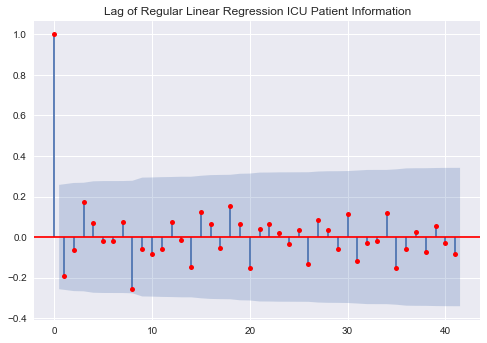

In [58]:
fig = tsaplots.plot_acf(case_predict_y, lags=41, color='r', title='Lag of Regular Linear Regression ICU Patient Information') 
plt.show() #plot the lag for the output of the predicted feature ICU patients

The x axis displays the number of lags and the y-axis displays the autocorrelation at the number of lags. By default, the plot starts at lag = 0 and the autcorrelation will always be 1 at lag = 0. It is showing the lag from the 0 - 10 

LASSO Linear Regression Lag

In [54]:
sm.tsa.acf(lasso_case_predict_y) #plotting the lag or autocorrelation of the icu prediction

/Users/bryanekeh/.local/share/virtualenvs/inf2179-LwGPGwJW/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
/Users/bryanekeh/.local/share/virtualenvs/inf2179-LwGPGwJW/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


array([ 1.        , -0.16301585, -0.06844061,  0.18953882,  0.06771635,
       -0.00709031,  0.00249059,  0.06886026, -0.26026474, -0.07126311,
       -0.05581769, -0.06476977,  0.0829009 , -0.01909556, -0.15434403,
        0.12478046,  0.07822935, -0.05119325,  0.14949245,  0.06503419,
       -0.15180965,  0.0308825 ,  0.08255602,  0.00689012, -0.03603758,
        0.03494428, -0.14624543,  0.08849425,  0.04227619, -0.06946478,
        0.09001052, -0.11045437, -0.04273491, -0.01531451,  0.11110121,
       -0.14740864, -0.0719737 ,  0.01430387, -0.06294246,  0.06001464,
       -0.02120034])

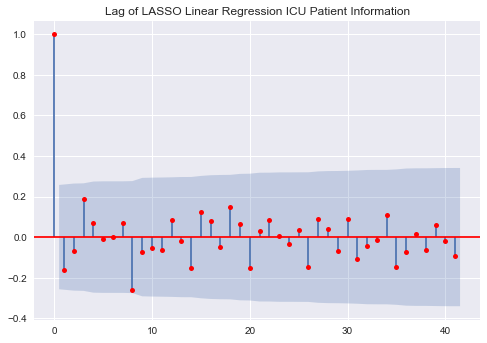

In [57]:
fig = tsaplots.plot_acf(lasso_case_predict_y, lags=41, color='r', title='Lag of LASSO Linear Regression ICU Patient Information') 
plt.show() #plot the lag of the LASSO Linear Regression 

We can see that an interpretation of the Autocorrelation Function (ACF) which plots the ICU patients on the x-axis and the level autocorrelation on the y-axis, tells us that the ACF values all lie within the 95% confidence interval for lags > 0. This tells us that our data does not have any autocorrelation. 

This is surprising because ICU patients rarely leave the ICU after one day of having COVID-19. In fact, in Canada all patients must be isolated for 14 days in a hospital after a positive COVID-19 test. This means that there is more to uncover about the data. 

Uncovering seasonality with autocorrelation 

In [88]:
rregressionSeasonality_df = pd.DataFrame(case_predict_y) #converting the ICU patient prediction for the regular linear regression into a pandas data frame

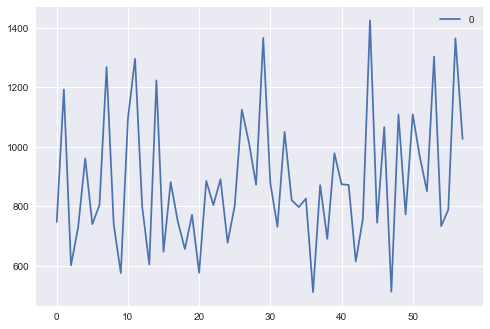

In [89]:
rregressionSeasonality_df.plot(kind='line')
plt.show() #Plotting to see if there is seasonality

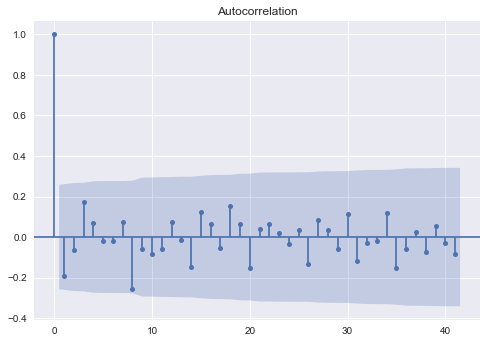

In [90]:
plot_acf(rregressionSeasonality_df, lags=41)
plt.show()#confirming the seasonality by plotting the ACF for the regular linear regression

In [84]:
type(lasso_case_predict_y)

numpy.ndarray

In [85]:
lassoSeasonality_df = pd.DataFrame(lasso_case_predict_y)#converting the lasso linear regression output for icu levels to a pandas dataframe

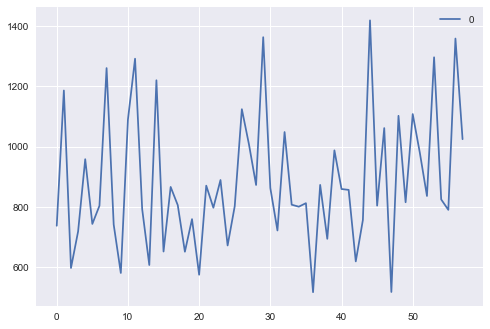

In [86]:
lassoSeasonality_df.plot(kind='line')#checking if there is seasonality within the data
plt.show()

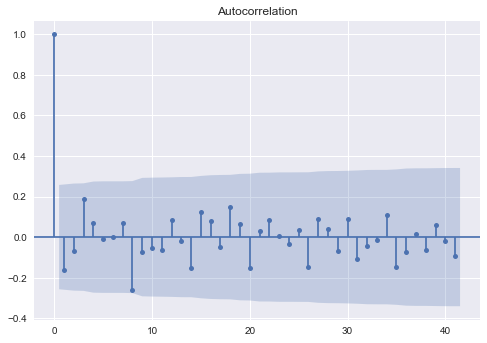

In [87]:
plot_acf(lassoSeasonality_df, lags=41)
plt.show()#confirming the seasonlity by plotting the auto correlation curve

In order to take a look at the trend of the tume series data, we first need to remove the seasonality. Lagged differencing is simple transformation method tha can be used to remove the seasonal component of the series. 

A lagged difference is defined by:

difference(t) = observation(t) - observation(t-interval)2,

where the interval is the period. To calculate the lagged difference in the icu level data use the function below 

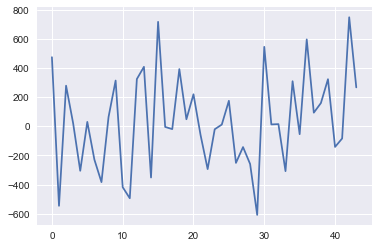

In [108]:
#Removing the seasonality in order to find the trend from the regular regression
regularRegression = rregressionSeasonality_df.values
diff = []
interval = 14 # length of isolation

for i in range(interval,len(regularRegression)):
    value = regularRegression[i] - regularRegression[i - interval]
    diff.append(value)
pyplot.plot(diff)
pyplot.show()




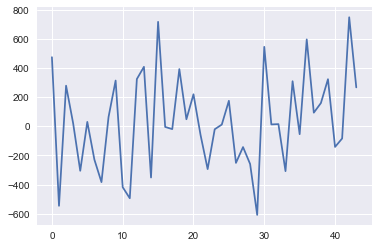

In [109]:
#Removing the seasonality in order to find the trend from the lasso regression
lassoRegression = lassoSeasonality_df.values
l_diff = []
interval = 14 # length of isolation

for i in range(interval,len(lassoRegression)):
    value = lassoRegression[i] - lassoRegression[i - interval]
    l_diff.append(value)
pyplot.plot(diff)
pyplot.show()

In [112]:
rregressionLag_df = DataFrame(diff)

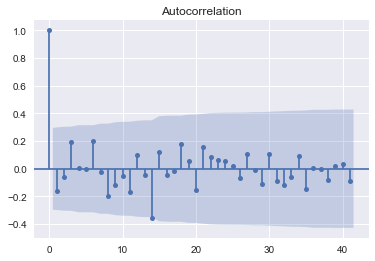

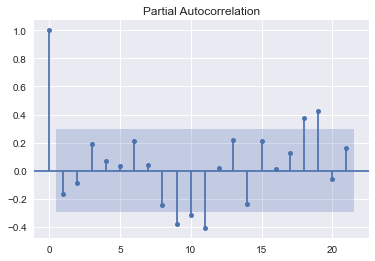

In [118]:
plot_acf(rregressionLag_df, lags=41)
plot_pacf(rregressionLag_df, lags=21)
plt.show()

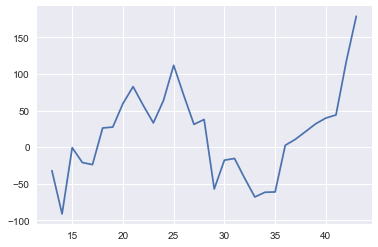

In [131]:
#Calculating the rolling average of regular regression

moving_averageRR = rregressionLag_df.rolling(window = 14).mean()
pyplot.plot(moving_averageRR)
pyplot.show()

In [115]:
lassoregressionLag_df = DataFrame(l_diff)

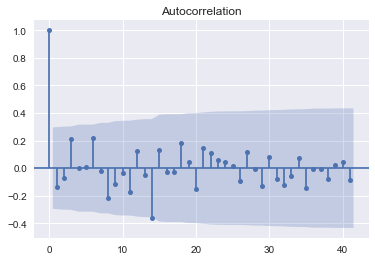

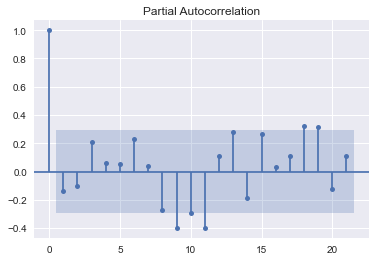

In [119]:
plot_acf(lassoregressionLag_df, lags=41)
plot_pacf(lassoregressionLag_df, lags=21)
plt.show()

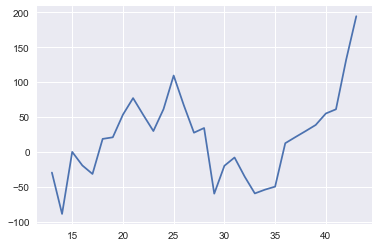

In [130]:
#Calculating the rolling average of LASSO regression

moving_averageLR = lassoregressionLag_df.rolling(window = 14).mean()
pyplot.plot(moving_averageLR)
pyplot.show()